In [1]:
import pandas as pd
import numpy as np


In [2]:
#import csv file

train_df = pd.read_csv('data/asl-signs/train.csv')
train_df.head()

,path,participant_id,sequence_id,sign
0,train_landmark_files/26734/1000035562.parquet,26734,1000035562,blow
1,train_landmark_files/28656/1000106739.parquet,28656,1000106739,wait
2,train_landmark_files/16069/100015657.parquet,16069,100015657,cloud
3,train_landmark_files/25571/1000210073.parquet,25571,1000210073,bird
4,train_landmark_files/62590/1000240708.parquet,62590,1000240708,owie


In [9]:
train_df.shape

(94477, 4)

In [54]:
train_df[['sign', 'participant_id']].groupby('sign').count().sort_values(by='participant_id')

,participant_id
sign,
zipper,299
vacuum,307
beside,310
person,312
dance,312
...,...
mouse,408
donkey,410
shhh,411


<AxesSubplot:xlabel='sign'>

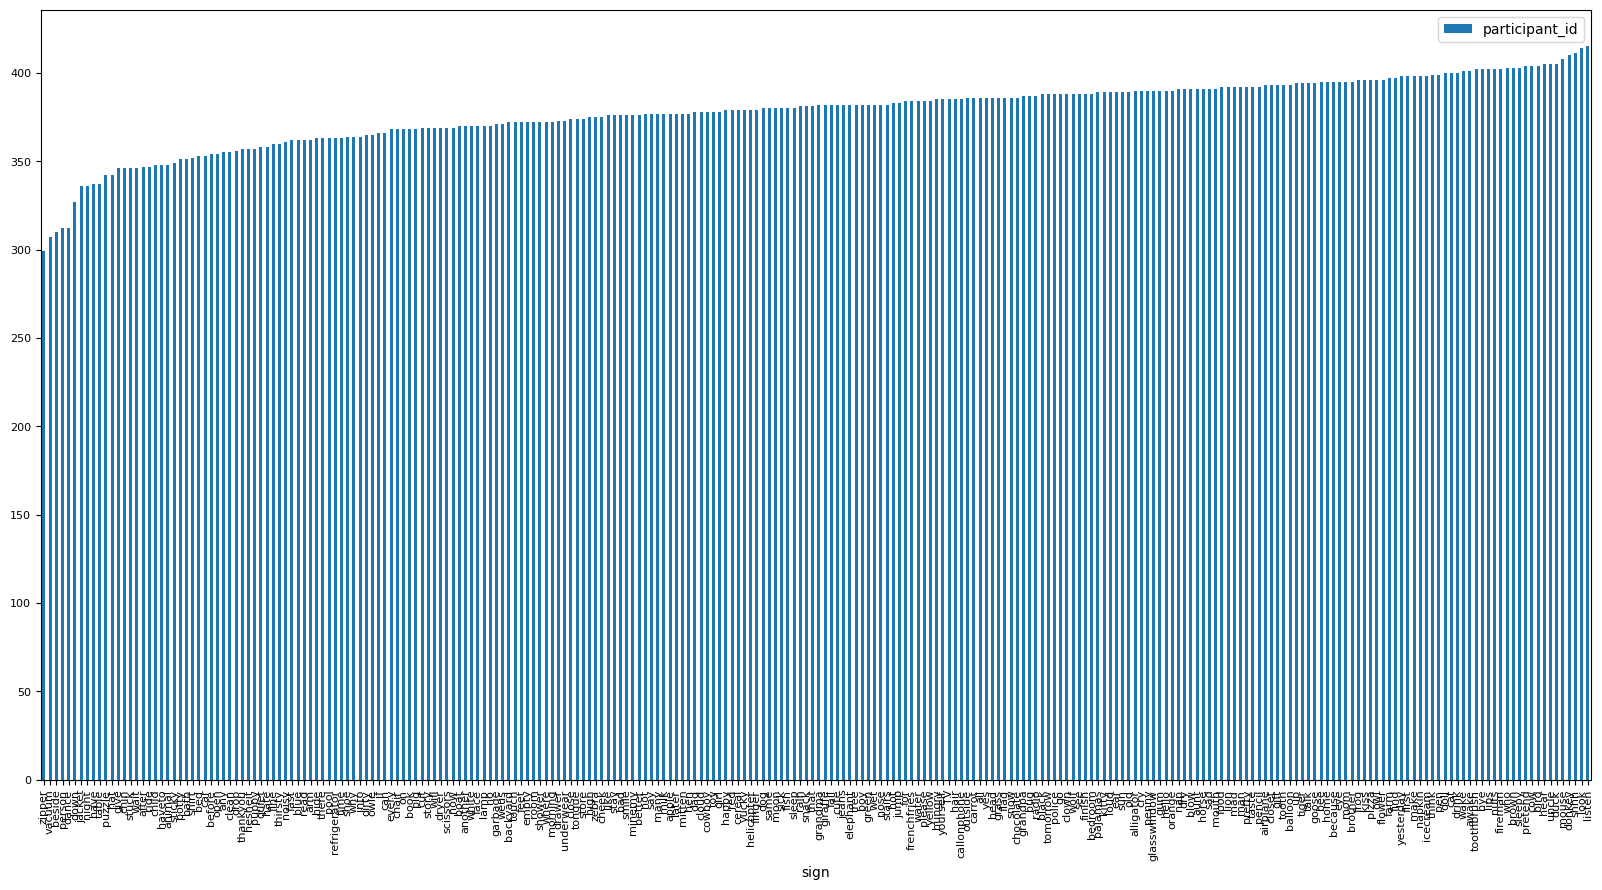

In [34]:
train_df[['sign', 'participant_id']].groupby('sign').count().sort_values(by='participant_id').plot(kind='bar', figsize=(20,10), fontsize=8)

In [78]:
# check for duplicates
train_df.duplicated().sum()

0

In [53]:
train_df[['participant_id', 'sign']].groupby('participant_id').count()

,sign
participant_id,
2044,4810
4718,3499
16069,4848
18796,3502
22343,4677
25571,3865
26734,4841
27610,4275
28656,4563


<AxesSubplot:xlabel='sign'>

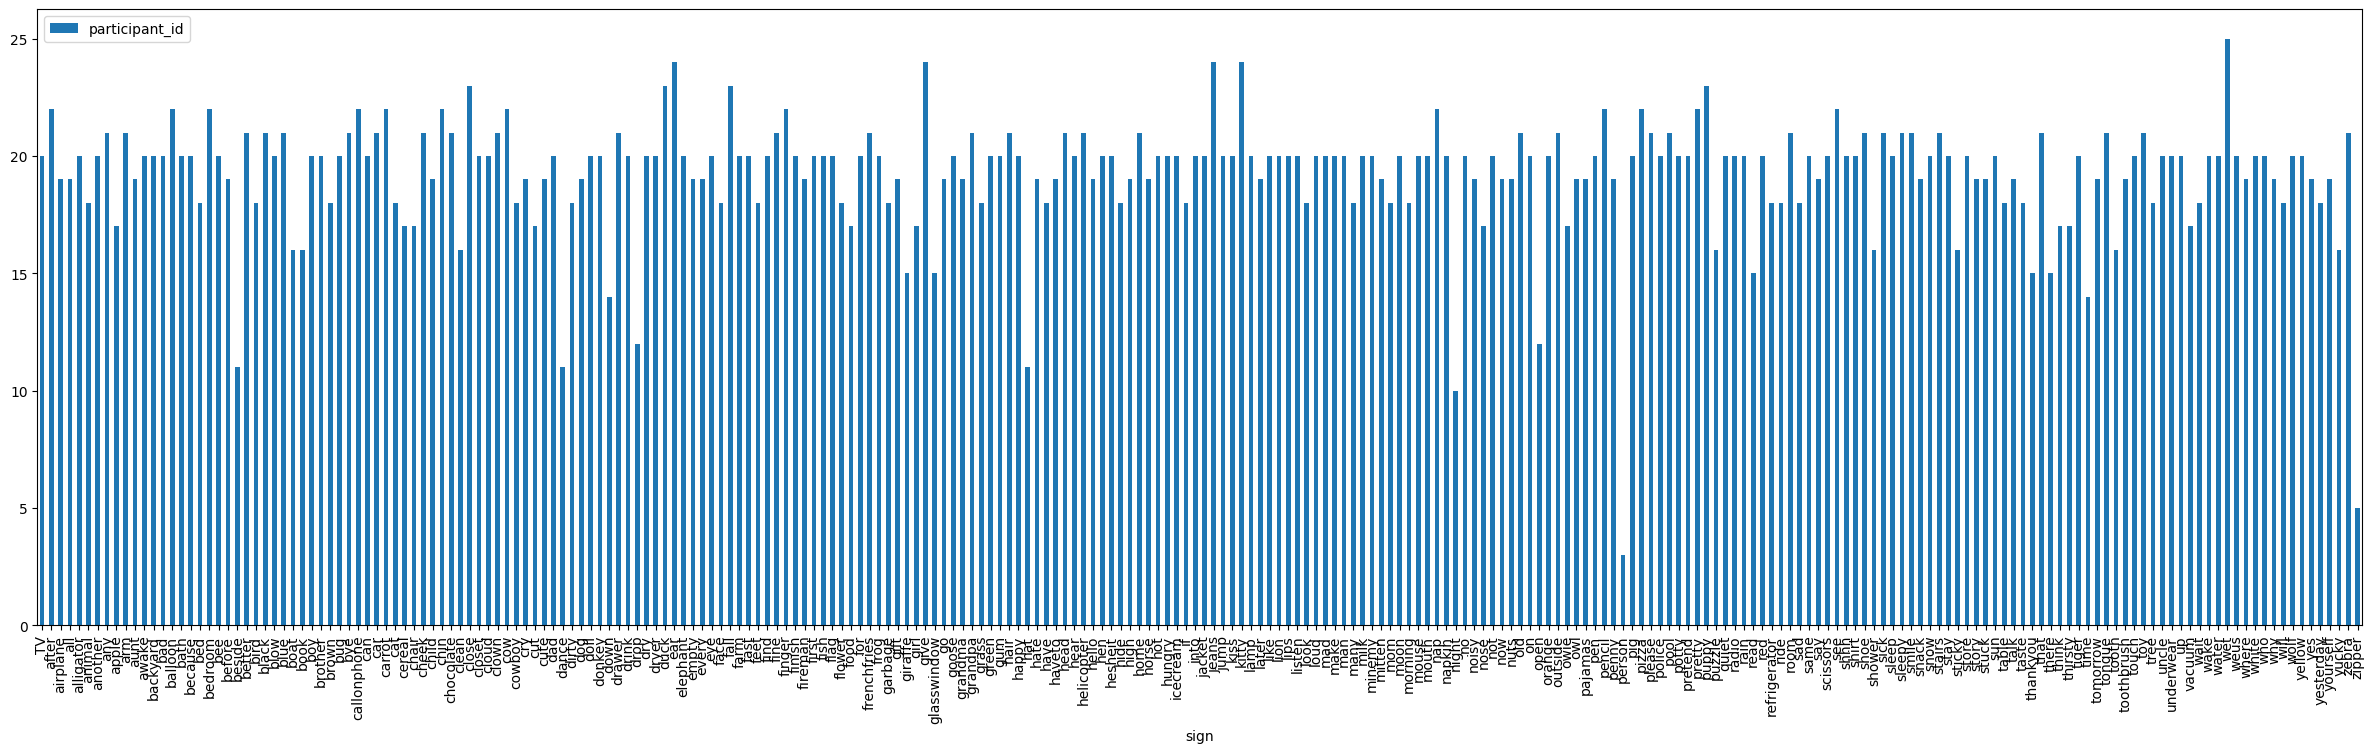

In [131]:
train_df[['participant_id', 'sign']].query('participant_id == 2044').groupby('sign').count().plot(kind='bar', figsize=(30,8))

# Parquet files

In [56]:
df_1 = pd.read_parquet('data/asl-signs/train_landmark_files/16069/1005009451.parquet')
df_1.shape

(13575, 7)

In [60]:
df_1.tail()

,frame,row_id,type,landmark_index,x,y,z
13570,51,51-right_hand-16,right_hand,16,NaN,NaN,NaN
13571,51,51-right_hand-17,right_hand,17,NaN,NaN,NaN
13572,51,51-right_hand-18,right_hand,18,NaN,NaN,NaN
13573,51,51-right_hand-19,right_hand,19,NaN,NaN,NaN
13574,51,51-right_hand-20,right_hand,20,NaN,NaN,NaN


In [61]:
df_1.groupby('type').count()

,frame,row_id,landmark_index,x,y,z
type,,,,,,
face,11700,11700,11700,11700,11700,11700
left_hand,525,525,525,294,294,294
pose,825,825,825,825,825,825
right_hand,525,525,525,0,0,0


In [73]:
# count of landmarks for hand
df_1.groupby(['type', 'landmark_index']).count().query('type == "pose"')

frame  row_id   x   y   z
type landmark_index                           
pose 0                  25      25  25  25  25
     1                  25      25  25  25  25
     2                  25      25  25  25  25
     3                  25      25  25  25  25
     4                  25      25  25  25  25
     5                  25      25  25  25  25
     6                  25      25  25  25  25
     7                  25      25  25  25  25
     8                  25      25  25  25  25
     9                  25      25  25  25  25
     10                 25      25  25  25  25
     11                 25      25  25  25  25
     12                 25      25  25  25  25
     13                 25      25  25  25  25
     14                 25      25  25  25  25
     15                 25      25  25  25  25
     16                 25      25  25  25  25
     17                 25      25  25  25  25
     18                 25      25  25  25  25
     19                 25      25  25  25  25
     20                 25      25  25  25  25
     21                 25      25  25  25  25
     22                 25      25  25  25  25
     23                 25      25  25  25  25
     24                 25      25  25  25  25
     25                 25      25  25  25  25
     26                 25      25  25  25  25
     27                 25      25  25  25  25
     28                 25      25  25  25  25
     29                 25      25  25  25  25
     30                 25      25  25  25  25
     31                 25      25  25  25  25
     32                 25      25  25  25  25

In [74]:
sign_map = {"TV": 0, "after": 1, "airplane": 2, "all": 3, "alligator": 4, "animal": 5, "another": 6, "any": 7, "apple": 8, "arm": 9, "aunt": 10, "awake": 11, "backyard": 12, "bad": 13, "balloon": 14, "bath": 15, "because": 16, "bed": 17, "bedroom": 18, "bee": 19, "before": 20, "beside": 21, "better": 22, "bird": 23, "black": 24, "blow": 25, "blue": 26, "boat": 27, "book": 28, "boy": 29, "brother": 30, "brown": 31, "bug": 32, "bye": 33, "callonphone": 34, "can": 35, "car": 36, "carrot": 37, "cat": 38, "cereal": 39, "chair": 40, "cheek": 41, "child": 42, "chin": 43, "chocolate": 44, "clean": 45, "close": 46, "closet": 47, "cloud": 48, "clown": 49, "cow": 50, "cowboy": 51, "cry": 52, "cut": 53, "cute": 54, "dad": 55, "dance": 56, "dirty": 57, "dog": 58, "doll": 59, "donkey": 60, "down": 61, "drawer": 62, "drink": 63, "drop": 64, "dry": 65, "dryer": 66, "duck": 67, "ear": 68, "elephant": 69, "empty": 70, "every": 71, "eye": 72, "face": 73, "fall": 74, "farm": 75, "fast": 76, "feet": 77, "find": 78, "fine": 79, "finger": 80, "finish": 81, "fireman": 82, "first": 83, "fish": 84, "flag": 85, "flower": 86, "food": 87, "for": 88, "frenchfries": 89, "frog": 90, "garbage": 91, "gift": 92, "giraffe": 93, "girl": 94, "give": 95, "glasswindow": 96, "go": 97, "goose": 98, "grandma": 99, "grandpa": 100, "grass": 101, "green": 102, "gum": 103, "hair": 104, "happy": 105, "hat": 106, "hate": 107, "have": 108, "haveto": 109, "head": 110, "hear": 111, "helicopter": 112, "hello": 113, "hen": 114, "hesheit": 115, "hide": 116, "high": 117, "home": 118, "horse": 119, "hot": 120, "hungry": 121, "icecream": 122, "if": 123, "into": 124, "jacket": 125, "jeans": 126, "jump": 127, "kiss": 128, "kitty": 129, "lamp": 130, "later": 131, "like": 132, "lion": 133, "lips": 134, "listen": 135, "look": 136, "loud": 137, "mad": 138, "make": 139, "man": 140, "many": 141, "milk": 142, "minemy": 143, "mitten": 144, "mom": 145, "moon": 146, "morning": 147, "mouse": 148, "mouth": 149, "nap": 150, "napkin": 151, "night": 152, "no": 153, "noisy": 154, "nose": 155, "not": 156, "now": 157, "nuts": 158, "old": 159, "on": 160, "open": 161, "orange": 162, "outside": 163, "owie": 164, "owl": 165, "pajamas": 166, "pen": 167, "pencil": 168, "penny": 169, "person": 170, "pig": 171, "pizza": 172, "please": 173, "police": 174, "pool": 175, "potty": 176, "pretend": 177, "pretty": 178, "puppy": 179, "puzzle": 180, "quiet": 181, "radio": 182, "rain": 183, "read": 184, "red": 185, "refrigerator": 186, "ride": 187, "room": 188, "sad": 189, "same": 190, "say": 191, "scissors": 192, "see": 193, "shhh": 194, "shirt": 195, "shoe": 196, "shower": 197, "sick": 198, "sleep": 199, "sleepy": 200, "smile": 201, "snack": 202, "snow": 203, "stairs": 204, "stay": 205, "sticky": 206, "store": 207, "story": 208, "stuck": 209, "sun": 210, "table": 211, "talk": 212, "taste": 213, "thankyou": 214, "that": 215, "there": 216, "think": 217, "thirsty": 218, "tiger": 219, "time": 220, "tomorrow": 221, "tongue": 222, "tooth": 223, "toothbrush": 224, "touch": 225, "toy": 226, "tree": 227, "uncle": 228, "underwear": 229, "up": 230, "vacuum": 231, "wait": 232, "wake": 233, "water": 234, "wet": 235, "weus": 236, "where": 237, "white": 238, "who": 239, "why": 240, "will": 241, "wolf": 242, "yellow": 243, "yes": 244, "yesterday": 245, "yourself": 246, "yucky": 247, "zebra": 248, "zipper": 249}

In [76]:
# applying dictionary on sign to create target column
train_df['target'] = train_df.sign.map(sign_map)
train_df.head()

,path,participant_id,sequence_id,sign,target
0,train_landmark_files/26734/1000035562.parquet,26734,1000035562,blow,25
1,train_landmark_files/28656/1000106739.parquet,28656,1000106739,wait,232
2,train_landmark_files/16069/100015657.parquet,16069,100015657,cloud,48
3,train_landmark_files/25571/1000210073.parquet,25571,1000210073,bird,23
4,train_landmark_files/62590/1000240708.parquet,62590,1000240708,owie,164


* Limit data to 2 participants and 5 signs
* Start with hand landmarks
* Next step add more signs/participants
* Next step add pose,
* Next step add face


delete z coordinate



In [82]:
#Limit Participants 2044 & 4718

df_f = train_df.query('participant_id == 2044 or participant_id == 4718')
df_f.head()

,path,participant_id,sequence_id,sign,target
27,train_landmark_files/4718/1001385785.parquet,4718,1001385785,clown,49
46,train_landmark_files/2044/1001950812.parquet,2044,1001950812,milk,142
52,train_landmark_files/2044/1002091184.parquet,2044,1002091184,duck,67
53,train_landmark_files/2044/1002092995.parquet,2044,1002092995,blow,25
87,train_landmark_files/2044/1003433922.parquet,2044,1003433922,sticky,206


In [83]:
df_f.shape

(8309, 5)

In [85]:
df_f.sign.unique()

array(['clown', 'milk', 'duck', 'blow', 'sticky', 'yucky', 'look', 'mad',
       'bed', 'hesheit', 'time', 'stuck', 'bird', 'white', 'feet',
       'giraffe', 'sleepy', 'toy', 'dry', 'nap', 'wet', 'jump', 'puzzle',
       'yellow', 'closet', 'radio', 'tongue', 'doll', 'potty', 'arm',
       'snack', 'cat', 'child', 'hen', 'grandpa', 'cloud', 'orange',
       'uncle', 'make', 'pencil', 'stairs', 'better', 'jacket', 'mouth',
       'sad', 'icecream', 'there', 'all', 'every', 'shower', 'home',
       'shhh', 'like', 'please', 'lamp', 'cut', 'bee', 'black', 'owl',
       'before', 'tomorrow', 'sick', 'hungry', 'not', 'wake', 'chin',
       'boy', 'chocolate', 'cry', 'napkin', 'lips', 'bug', 'have',
       'where', 'fish', 'yesterday', 'shirt', 'down', 'kiss', 'puppy',
       'animal', 'pool', 'mouse', 'goose', 'fine', 'brother', 'nuts',
       'TV', 'drink', 'find', 'vacuum', 'haveto', 'hear', 'happy', 'eye',
       'room', 'aunt', 'read', 'store', 'police', 'wolf', 'mom', 'drawer',
      

In [93]:
sign_list = ['alligator', 'radio', 'moon', 'sleep', 'grandpa']


In [96]:
# Limiting dataset to 5 signs from sign_list
df_f=df_f[df_f['sign'].isin(sign_list)]
df_f.head()

,path,participant_id,sequence_id,sign,target
339,train_landmark_files/4718/1013877443.parquet,4718,1013877443,radio,182
472,train_landmark_files/2044/101990054.parquet,2044,101990054,grandpa,100
1814,train_landmark_files/2044/1075574670.parquet,2044,1075574670,alligator,4
2236,train_landmark_files/4718/1091869603.parquet,4718,1091869603,moon,146
2390,train_landmark_files/2044/1098158740.parquet,2044,1098158740,radio,182


In [97]:
df_f.shape

(166, 5)

In [99]:
df_f.groupby('sign').count()

,path,participant_id,sequence_id,target
sign,,,,
alligator,33,33,33,33
grandpa,29,29,29,29
moon,33,33,33,33
radio,32,32,32,32
sleep,39,39,39,39


# combining csv and parquet files

In [117]:
df_p = pd.read_parquet('data/asl-signs/train_landmark_files/2044/101990054.parquet')
df_p.head()

,frame,row_id,type,landmark_index,x,y,z
0,20,20-face-0,face,0,0.483103,0.518735,-0.040987
1,20,20-face-1,face,1,0.477903,0.482673,-0.063676
2,20,20-face-2,face,2,0.481932,0.494605,-0.036303
3,20,20-face-3,face,3,0.466381,0.453244,-0.040923
4,20,20-face-4,face,4,0.476341,0.472594,-0.066392


In [114]:
df_p.shape

(5973, 7)

In [118]:
# drop z
df_p.drop('z', inplace=True, axis=1)
df_p.head()

,frame,row_id,type,landmark_index,x,y
0,20,20-face-0,face,0,0.483103,0.518735
1,20,20-face-1,face,1,0.477903,0.482673
2,20,20-face-2,face,2,0.481932,0.494605
3,20,20-face-3,face,3,0.466381,0.453244
4,20,20-face-4,face,4,0.476341,0.472594


In [119]:
# removing face landmarks
df_p = df_p[df_p['type'] != 'face']
df_p.head()

,frame,row_id,type,landmark_index,x,y
468,20,20-left_hand-0,left_hand,0,NaN,NaN
469,20,20-left_hand-1,left_hand,1,NaN,NaN
470,20,20-left_hand-2,left_hand,2,NaN,NaN
471,20,20-left_hand-3,left_hand,3,NaN,NaN
472,20,20-left_hand-4,left_hand,4,NaN,NaN


In [120]:
# removing pose landmarks
df_p = df_p[df_p['type'] != 'pose']
df_p.head()

,frame,row_id,type,landmark_index,x,y
468,20,20-left_hand-0,left_hand,0,NaN,NaN
469,20,20-left_hand-1,left_hand,1,NaN,NaN
470,20,20-left_hand-2,left_hand,2,NaN,NaN
471,20,20-left_hand-3,left_hand,3,NaN,NaN
472,20,20-left_hand-4,left_hand,4,NaN,NaN


In [121]:
df_p.shape

(462, 6)

In [126]:
df_p.isna().sum()

frame               0
row_id              0
type                0
landmark_index      0
x                 273
y                 273
dtype: int64

In [130]:
# checking empty values for left and right hand
df_p[df_p['x'].isna()].groupby('type').count()

,frame,row_id,landmark_index,x,y
type,,,,,
left_hand,231,231,231,0,0
right_hand,42,42,42,0,0


In [142]:
# checking empty values for left and right hand
hand = df_p[df_p['x'].isna()].groupby('type').count().sort_values(by= 'frame', ascending=False).head(1).index[0]

In [144]:
# drop hand not used
df_p = df_p[df_p['type'] != hand]
df_p.head()

,frame,row_id,type,landmark_index,x,y
522,20,20-right_hand-0,right_hand,0,0.258956,0.582192
523,20,20-right_hand-1,right_hand,1,0.325414,0.528588
524,20,20-right_hand-2,right_hand,2,0.358872,0.465464
525,20,20-right_hand-3,right_hand,3,0.395878,0.428042
526,20,20-right_hand-4,right_hand,4,0.427379,0.400564


In [145]:
# checking empty values after removing unused hand
df_p.isna().sum()

frame              0
row_id             0
type               0
landmark_index     0
x                 42
y                 42
dtype: int64

In [147]:
# checking empty values for landmark index
df_p[df_p['x'].isna()].groupby('landmark_index').count()

,frame,row_id,type,x,y
landmark_index,,,,,
0,2,2,2,0,0
1,2,2,2,0,0
2,2,2,2,0,0
3,2,2,2,0,0
4,2,2,2,0,0
5,2,2,2,0,0
6,2,2,2,0,0
7,2,2,2,0,0
8,2,2,2,0,0


<AxesSubplot:xlabel='x', ylabel='y'>

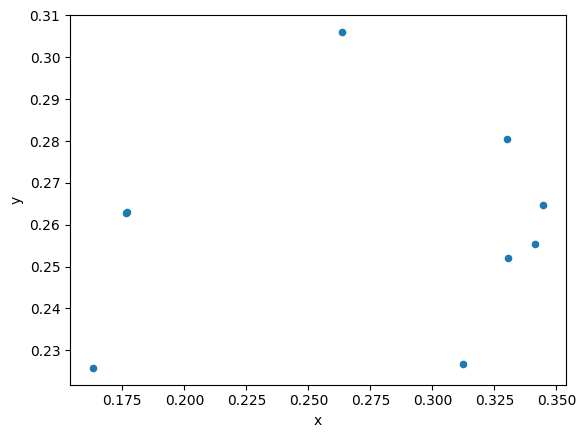

In [153]:
df_p[['landmark_index', 'x', 'y']].query('landmark_index == 10').plot(kind='scatter', x='x', y='y')

In [157]:
# interpolating empty values
# TODO: improve interpolation
df_p = df_p.interpolate(method='linear')

In [158]:
df_p[['landmark_index', 'x', 'y']].query('landmark_index == 10')

,landmark_index,x,y
532,10,0.263368,0.306070
1075,10,0.330242,0.280445
1618,10,0.344774,0.264683
2161,10,0.341439,0.255380
2704,10,0.330667,0.251952
3247,10,0.312167,0.226701
3790,10,0.368217,0.321700
4333,10,0.267734,0.444815
4876,10,0.176981,0.262996
5419,10,0.162996,0.225779


<AxesSubplot:xlabel='x', ylabel='y'>

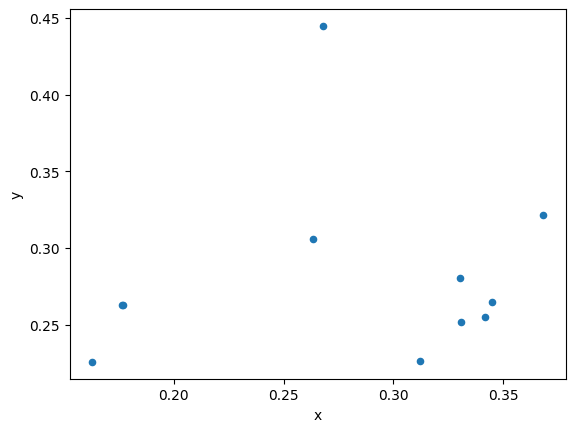

In [159]:
df_p[['landmark_index', 'x', 'y']].query('landmark_index == 10').plot(kind='scatter', x='x', y='y')

In [160]:
df_p.head()

,frame,row_id,type,landmark_index,x,y
522,20,20-right_hand-0,right_hand,0,0.258956,0.582192
523,20,20-right_hand-1,right_hand,1,0.325414,0.528588
524,20,20-right_hand-2,right_hand,2,0.358872,0.465464
525,20,20-right_hand-3,right_hand,3,0.395878,0.428042
526,20,20-right_hand-4,right_hand,4,0.427379,0.400564


In [162]:
# reseting frame to start with zero
frame_start = df_p.groupby('frame').count().index[0]

In [163]:
frame_start

20

In [166]:
df_p.frame = df_p.eval(f'frame - {frame_start}')
df_p.head()

,frame,row_id,type,landmark_index,x,y
522,0,20-right_hand-0,right_hand,0,0.258956,0.582192
523,0,20-right_hand-1,right_hand,1,0.325414,0.528588
524,0,20-right_hand-2,right_hand,2,0.358872,0.465464
525,0,20-right_hand-3,right_hand,3,0.395878,0.428042
526,0,20-right_hand-4,right_hand,4,0.427379,0.400564


In [167]:
df_p.shape

(231, 6)

In [168]:
df_p.head()

,frame,row_id,type,landmark_index,x,y
522,0,20-right_hand-0,right_hand,0,0.258956,0.582192
523,0,20-right_hand-1,right_hand,1,0.325414,0.528588
524,0,20-right_hand-2,right_hand,2,0.358872,0.465464
525,0,20-right_hand-3,right_hand,3,0.395878,0.428042
526,0,20-right_hand-4,right_hand,4,0.427379,0.400564
